In [5]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
df = pd.read_csv('code_survey.csv', dtype={'age':'str', 'experience': 'str', 'gender': 'str'})
df.head()

,year,age,experience,salary,sql,javascript,css,c#,java,php,...,wordpress,ios,lamp,mongodb,cloud,.net,react.js,typescript,swift,bash
0,2011,< 20,<2,Student / Unemployed,0,1,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,25-29,41310,NaN,1,0,0.0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011,25-29,41435,NaN,1,1,0.0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,< 20,41310,Student / Unemployed,0,0,0.0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,35-39,11,"$80,000 - $100,000",1,1,1.0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# convert salary to category
salary_order = ['Student / Unemployed', 
                'Less than $20,000', 
                '$20,000 - $40,000', 
                '$40,000 - $60,000', 
                '$60,000 - $80,000', 
                '$80,000 - $100,000', 
                '$100,000 - $120,000',
                '$120,000 - $140,000',
                'More than $140,000']
salary_type = pd.api.types.CategoricalDtype(salary_order, ordered=True)
df.salary = df.salary.astype(salary_type)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347687 entries, 0 to 347686
Data columns (total 33 columns):
year           347687 non-null int64
age            250815 non-null object
experience     292946 non-null object
salary         236899 non-null category
sql            347687 non-null int64
javascript     347687 non-null int64
css            107911 non-null float64
c#             347687 non-null int64
java           347687 non-null int64
php            347687 non-null int64
c              258804 non-null float64
c++            347687 non-null int64
python         347687 non-null int64
ruby           77833 non-null float64
perl           9056 non-null float64
html           193981 non-null float64
objective-c    23628 non-null float64
jquery         98625 non-null float64
node.js        338631 non-null float64
gender         273598 non-null object
sql server     82116 non-null float64
android        82116 non-null float64
angular.js     321246 non-null float64
wordpress      26

In [111]:
df.describe()

,year,sql,javascript,css,c#,java,php,c,c++,python,...,wordpress,ios,lamp,mongodb,cloud,.net,react.js,typescript,swift,bash
count,347687.000000,347687.000000,347687.000000,107911.000000,347687.000000,347687.000000,347687.000000,258804.000000,347687.000000,347687.000000,...,26086.000000,26086.000000,82116.000000,56030.000000,56030.000000,239130.000000,239130.000000,140275.000000,51392.000000,187738.000000
mean,2017.168051,0.446810,0.544142,0.511153,0.281817,0.347528,0.240006,0.158966,0.195719,0.290963,...,0.076938,0.074983,0.082164,0.085311,0.082616,0.178472,0.159608,0.156913,0.046077,0.336442
std,1.768113,0.497163,0.498048,0.499878,0.449885,0.476186,0.427087,0.365645,0.396754,0.454207,...,0.266498,0.263369,0.274616,0.279347,0.275304,0.382910,0.366243,0.363720,0.209654,0.472493
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# identify the tech and non tech columns
non_tech_cols = ['year', 'age', 'experience', 'salary', 'gender']
tech_cols = [x for x in df.columns if x not in non_tech_cols]

## Data Analysis

#### Q1: What are the most popular languages in the last 9 years?

In [113]:
# Taking a mean of languages over all the 9 years will skew the data as there is a lot more data in the latter years
# Hence we will take a mean of the data every year, and then take a mean of this
df_means = df.groupby('year').agg(['mean'])
df_means.columns = df_means.columns.get_level_values(0)
df_means.head()

,sql,javascript,css,c#,java,php,c,c++,python,ruby,...,wordpress,ios,lamp,mongodb,cloud,.net,react.js,typescript,swift,bash
year,,,,,,,,,,,,,,,,,,,,,
2011,0.573409,0.504444,0.482048,0.480626,0.306079,0.280128,0.263420,0.263064,0.204408,0.101315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,0.527631,0.500881,0.452347,0.395323,0.376101,0.308345,0.237706,0.244434,0.193817,0.092424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,0.471464,0.486040,NaN,0.310716,0.309998,0.238555,0.147403,0.174092,0.192979,0.081503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,0.453618,0.494963,NaN,0.311134,0.324349,0.223734,0.153605,0.185529,0.192725,0.077587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,0.361842,0.458560,NaN,0.266388,0.315073,0.250288,0.138465,0.173618,0.200797,NaN,...,0.076938,0.074983,0.073833,NaN,NaN,NaN,NaN,NaN,NaN,NaN


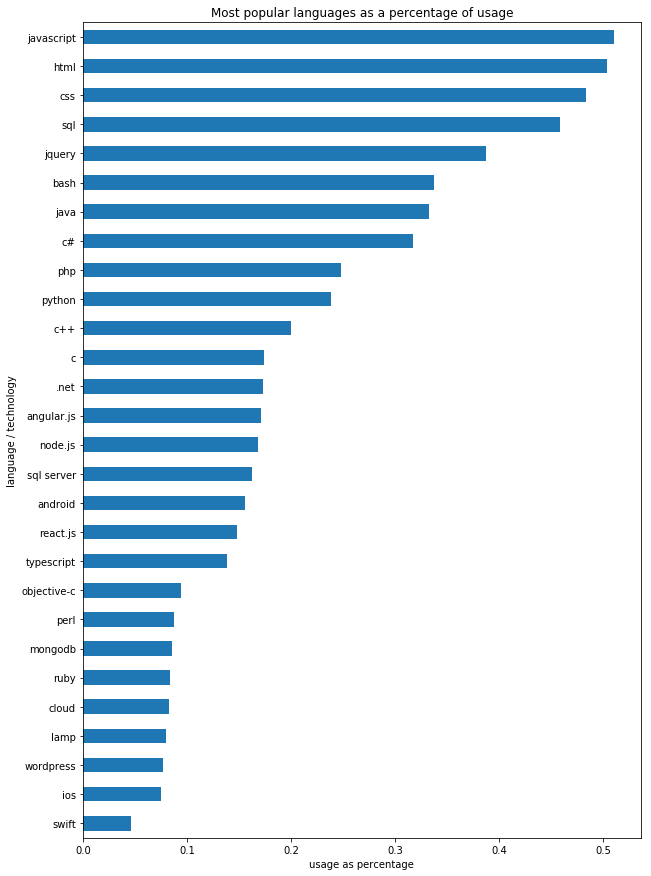

In [127]:
plt.figure(figsize=(10,15))
df_means.mean().sort_values(ascending=True).plot(kind='barh', color=base_color)
plt.ylabel('language / technology')
plt.xlabel('usage as percentage')
plt.title('Most popular languages as a percentage of usage')
plt.show();

#### Q2: How have the top 3 languages grown year on year?

#### Q3: Which are the most popular languages in the last 3 years seen yearly?

#### Q4: In terms of the pay scale, which are the top 3 languages at the highest and lowest ranges for compensation?

In [16]:
# look at numbers for languages on a yearly basis as a proportion of total
# Note: total proportion will be > 1 as there are more than one responses by a single respondent


,sql,javascript,css,c#,java,php,c,c++,python,ruby,...,wordpress,ios,lamp,mongodb,cloud,.net,react.js,typescript,swift,bash
year,,,,,,,,,,,,,,,,,,,,,
2011,0.573409,0.504444,0.482048,0.480626,0.306079,0.280128,0.263420,0.263064,0.204408,0.101315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,0.527631,0.500881,0.452347,0.395323,0.376101,0.308345,0.237706,0.244434,0.193817,0.092424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,0.471464,0.486040,NaN,0.310716,0.309998,0.238555,0.147403,0.174092,0.192979,0.081503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,0.453618,0.494963,NaN,0.311134,0.324349,0.223734,0.153605,0.185529,0.192725,0.077587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,0.361842,0.458560,NaN,0.266388,0.315073,0.250288,0.138465,0.173618,0.200797,NaN,...,0.076938,0.074983,0.073833,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# now melt the language columns so that we have the distribution of languages on a yearly basis
df_tech_melt = pd.melt(df_tech, id_vars='year', var_name='language', value_name='usage')
df_tech_melt.head()

,year,language,usage
0,2011,sql,0.573409
1,2012,sql,0.527631
2,2013,sql,0.471464
3,2014,sql,0.453618
4,2015,sql,0.361842


In [83]:
# which are the most popular languages in each year
df_tech_melt.query('year == 2011 and usage > 0').sort_values('usage', ascending=False)

,year,language,usage
0,2011,sql,0.573409
9,2011,javascript,0.504444
18,2011,css,0.482048
27,2011,c#,0.480626
36,2011,java,0.306079
45,2011,php,0.280128
54,2011,c,0.263420
63,2011,c++,0.263064
72,2011,python,0.204408
81,2011,ruby,0.101315


In [84]:
df_tech_melt.query('year == 2012 and usage > 0').sort_values('usage', ascending=False)

,year,language,usage
1,2012,sql,0.527631
10,2012,javascript,0.500881
19,2012,css,0.452347
28,2012,c#,0.395323
37,2012,java,0.376101
100,2012,html,0.345026
46,2012,php,0.308345
64,2012,c++,0.244434
55,2012,c,0.237706
73,2012,python,0.193817


In [85]:
# before we can plot, let's sort the languages over all according to most popular
df_means = df_tech_melt.groupby('language').agg({'usage':'mean'}).sort_values('usage', ascending=False)
ordered_lang = list(df_means.index)

# let's also select the top 20 languages only 
ordered_lang = ordered_lang[0:20]

In [94]:
df_means.reset_index(inplace=True)

In [64]:
# define the palettes
base_color = sns.color_palette()[0]

NameError: name 'get_xticklabels' is not defined

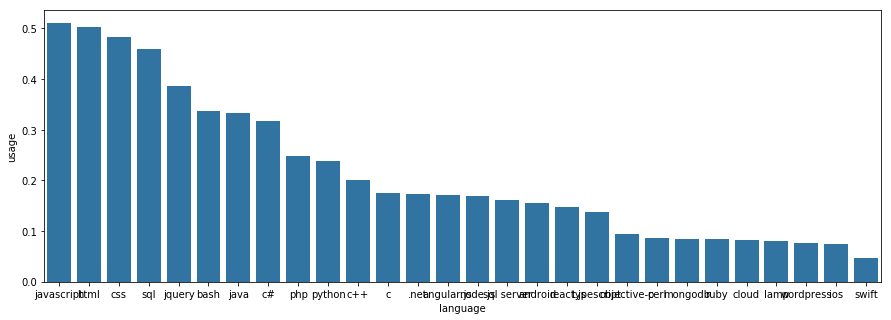

In [108]:
# let us plot the overall means to see which languages are most popular
plt.figure(figsize=(15,5))
sns.barplot(data=df_means, x='language', y='usage', color=base_color)
plt.gca().set_xticklabels(get_xticklabels(), rotation=30)
plt.show();

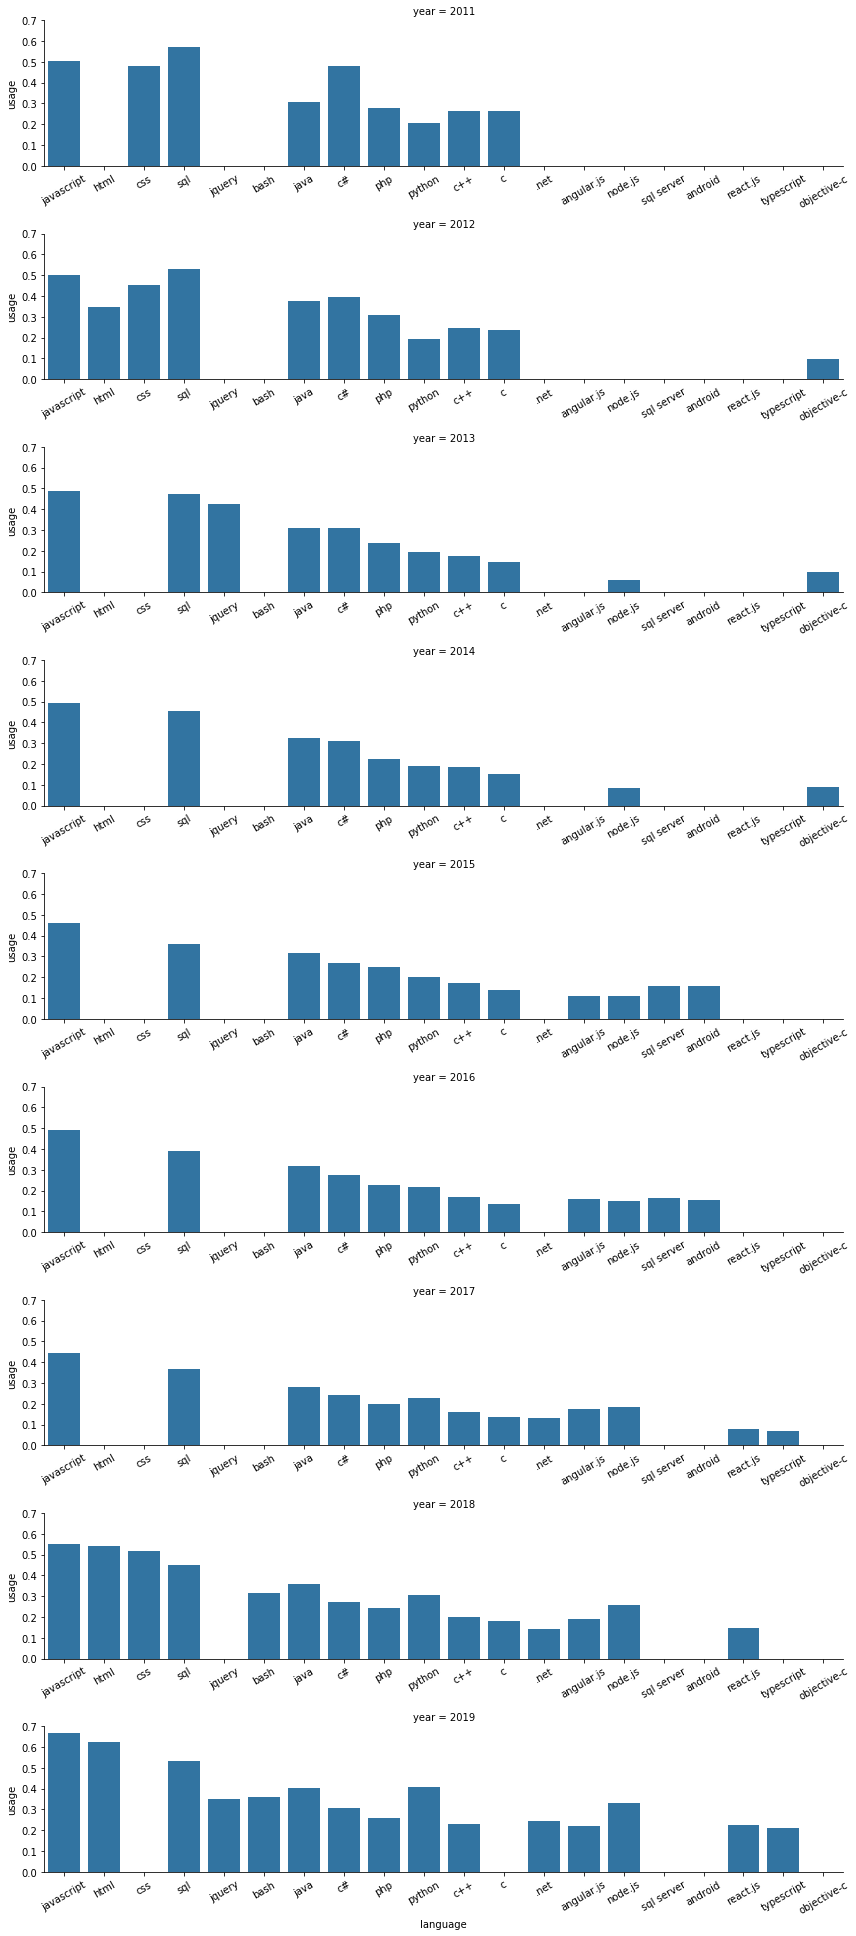

In [71]:
# Let us now take a look at the growth of each language over the years
g = sns.FacetGrid(df_tech_melt, row='year', height=3, aspect=4)
g.map(sns.barplot, 'language', 'usage', order=ordered_lang, color=base_color)

# get labels from the last facet
labels = g.axes.flat[-1].get_xticklabels()

# add labels to the grid
for ax in g.axes.flat:
    ax.tick_params(labelbottom=True)
    ax.set_xticklabels(labels, rotation=30)
    
plt.tight_layout();    
plt.show();



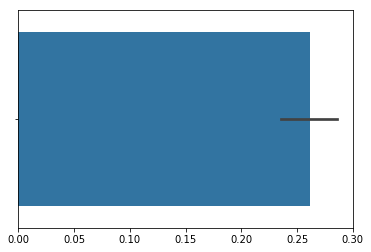

In [8]:
sns.barplot(data=df_tech, x=df_tech.columns)